In [1]:
import pandas as pd
CPI = pd.read_csv("Data/CPI.csv",index_col=0)
CPI.columns = ["CPI"]
CPI.index = pd.to_datetime(CPI.index)
print(CPI)

                CPI
DATE               
1947-01-01   21.480
1947-02-01   21.620
1947-03-01   22.000
1947-04-01   22.000
1947-05-01   21.950
1947-06-01   22.080
1947-07-01   22.230
1947-08-01   22.400
1947-09-01   22.840
1947-10-01   22.910
1947-11-01   23.060
1947-12-01   23.410
1948-01-01   23.680
1948-02-01   23.670
1948-03-01   23.500
1948-04-01   23.820
1948-05-01   24.010
1948-06-01   24.150
1948-07-01   24.400
1948-08-01   24.430
1948-09-01   24.360
1948-10-01   24.310
1948-11-01   24.160
1948-12-01   24.050
1949-01-01   24.010
1949-02-01   23.910
1949-03-01   23.910
1949-04-01   23.920
1949-05-01   23.910
1949-06-01   23.920
...             ...
2017-09-01  246.445
2017-10-01  246.570
2017-11-01  247.333
2017-12-01  247.847
2018-01-01  248.816
2018-02-01  249.475
2018-03-01  249.413
2018-04-01  249.957
2018-05-01  250.640
2018-06-01  251.176
2018-07-01  251.482
2018-08-01  251.905
2018-09-01  252.261
2018-10-01  252.777
2018-11-01  252.662
2018-12-01  252.653
2019-01-01  252.550


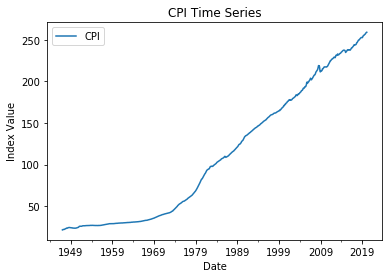

In [2]:
import matplotlib.pyplot as plt
#Plot
CPI.plot(kind="line")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("CPI Time Series")
plt.show()

In [3]:
real_estate = pd.read_csv("Data/Real Estate.csv",index_col=0)
real_estate.index = pd.to_datetime(real_estate.index)
real_estate.columns = ["Real Estate"]
print(real_estate)

            Real Estate
DATE                   
1975-01-01        59.77
1975-04-01        60.97
1975-07-01        61.18
1975-10-01        62.22
1976-01-01        62.90
1976-04-01        65.40
1976-07-01        66.60
1976-10-01        67.36
1977-01-01        69.44
1977-04-01        72.69
1977-07-01        74.40
1977-10-01        77.25
1978-01-01        79.60
1978-04-01        82.73
1978-07-01        85.22
1978-10-01        87.50
1979-01-01        91.40
1979-04-01        94.40
1979-07-01        96.38
1979-10-01        98.29
1980-01-01       100.00
1980-04-01       101.60
1980-07-01       104.51
1980-10-01       104.79
1981-01-01       105.37
1981-04-01       107.55
1981-07-01       109.15
1981-10-01       109.21
1982-01-01       110.97
1982-04-01       111.94
...                 ...
2012-07-01       310.54
2012-10-01       313.02
2013-01-01       314.65
2013-04-01       319.55
2013-07-01       324.51
2013-10-01       327.16
2014-01-01       330.04
2014-04-01       336.34
2014-07-01      

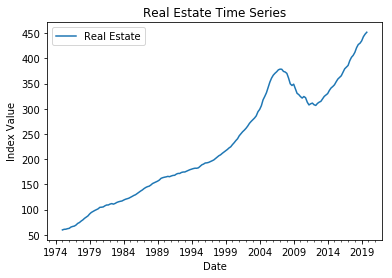

In [4]:
real_estate.plot(kind="line")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("Real Estate Time Series")
plt.show()

In [5]:
#You can access the quarter of the data through the quarter attribute
print(real_estate.index.quarter)

Int64Index([1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
            ...
            3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
           dtype='int64', name='DATE', length=180)


In [6]:
#By using zip, we can create a multi index where the dates become the year and quarter
multi_index = pd.MultiIndex.from_tuples(zip(real_estate.index.year,real_estate.index.quarter))
print(multi_index)

MultiIndex(levels=[[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44

In [7]:
#Set the real estate index
real_estate.index = multi_index
print(real_estate)

        Real Estate
1975 1        59.77
     2        60.97
     3        61.18
     4        62.22
1976 1        62.90
     2        65.40
     3        66.60
     4        67.36
1977 1        69.44
     2        72.69
     3        74.40
     4        77.25
1978 1        79.60
     2        82.73
     3        85.22
     4        87.50
1979 1        91.40
     2        94.40
     3        96.38
     4        98.29
1980 1       100.00
     2       101.60
     3       104.51
     4       104.79
1981 1       105.37
     2       107.55
     3       109.15
     4       109.21
1982 1       110.97
     2       111.94
...             ...
2012 3       310.54
     4       313.02
2013 1       314.65
     2       319.55
     3       324.51
     4       327.16
2014 1       330.04
     2       336.34
     3       341.17
     4       344.02
2015 1       347.51
     2       353.49
     3       358.88
     4       362.04
2016 1       365.36
     2       372.41
     3       379.06
     4       382.51


In [8]:
#If we group the CPI by quarter and year, we can apply the last function to get the latest row for each
#combination of quarter and year
quarterly_CPI = CPI.groupby([CPI.index.year, CPI.index.quarter]).last()
print(quarterly_CPI)

               CPI
DATE DATE         
1947 1      22.000
     2      22.080
     3      22.840
     4      23.410
1948 1      23.500
     2      24.150
     3      24.360
     4      24.050
1949 1      23.910
     2      23.920
     3      23.750
     4      23.610
1950 1      23.640
     2      23.880
     3      24.340
     4      24.980
1951 1      25.880
     2      25.930
     3      26.030
     4      26.470
1952 1      26.390
     2      26.530
     3      26.630
     4      26.710
1953 1      26.630
     2      26.770
     3      26.890
     4      26.870
1954 1      26.930
     2      26.940
...            ...
2012 4     231.221
2013 1     232.282
     2     232.445
     3     233.544
     4     234.719
2014 1     236.028
     2     237.231
     3     237.477
     4     236.252
2015 1     235.976
     2     237.657
     3     237.498
     4     237.761
2016 1     237.990
     2     240.144
     3     241.068
     4     242.712
2017 1     243.721
     2     244.179
     3     2

In [9]:
#Rename the indices
real_estate.index.names = ["Year", "Quarter"]
quarterly_CPI.index.names = ["Year", "Quarter"]
print(real_estate.head(5))
print(quarterly_CPI.head(5))

              Real Estate
Year Quarter             
1975 1              59.77
     2              60.97
     3              61.18
     4              62.22
1976 1              62.90
                CPI
Year Quarter       
1947 1        22.00
     2        22.08
     3        22.84
     4        23.41
1948 1        23.50


In [10]:
#Join the two together
data = real_estate.join(quarterly_CPI)
print(data)

              Real Estate      CPI
Year Quarter                      
1975 1              59.77   52.800
     2              60.97   53.500
     3              61.18   54.600
     4              62.22   55.600
1976 1              62.90   56.000
     2              65.40   56.700
     3              66.60   57.600
     4              67.36   58.400
1977 1              69.44   59.600
     2              72.69   60.500
     3              74.40   61.300
     4              77.25   62.300
1978 1              79.60   63.400
     2              82.73   65.000
     3              85.22   66.500
     4              87.50   67.900
1979 1              91.40   69.900
     2              94.40   72.200
     3              96.38   74.400
     4              98.29   76.900
1980 1             100.00   80.100
     2             101.60   82.500
     3             104.51   83.900
     4             104.79   86.400
1981 1             105.37   88.600
     2             107.55   90.500
     3             1

In [11]:
#Let's see what the values were at the end of 2000
print(data.loc[(1999,4)])

Real Estate    224.6
CPI            168.8
Name: (1999, 4), dtype: float64


In [12]:
#If we were to divide the data by this date and see from 2000 on, we would be able to see the group since 2000 began
returns = data / data.loc[(1999,4)]
returns = returns.loc[(2000,1):]
print(returns)

              Real Estate       CPI
Year Quarter                       
2000 1           1.019145  1.013033
     2           1.035752  1.020142
     3           1.054586  1.028436
     4           1.070837  1.034360
2001 1           1.097240  1.043246
     2           1.115628  1.052725
     3           1.132947  1.055095
     4           1.147017  1.050948
2002 1           1.163491  1.057464
     2           1.183304  1.063981
     3           1.206768  1.071090
     4           1.223865  1.077014
2003 1           1.238780  1.089455
     2           1.253874  1.084716
     3           1.273197  1.096564
     4           1.309261  1.098934
2004 1           1.329742  1.108412
     2           1.362199  1.119076
     3           1.414159  1.124408
     4           1.444346  1.135664
2005 1           1.477516  1.143957
     2           1.524711  1.147512
     3           1.570748  1.177725
     4           1.606322  1.173578
2006 1           1.631745  1.183057
     2           1.648442  1

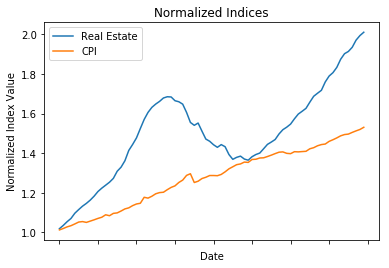

In [13]:
# Plot the data
returns.plot(kind='line')
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")
plt.show()

In [14]:
#You'll notice that the x axis, doesn't show up
#Let's make a string representation
quarter_index = returns.index.map(lambda x: str(x[0]) +"Q"+str(x[1]))
print(quarter_index)

Index(['2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2', '2001Q3',
       '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2',
       '2003Q3', '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1',
       '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3', '2006Q4',
       '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
       '2008Q4', '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
       '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1',
       '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
       '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3',
       '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
       '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4'],
      dtype='object')


In [15]:
#Now let's find every 4th index
index_positions = list(range(len(quarter_index)))
print(index_positions)
print()
print(index_positions[::4])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76]


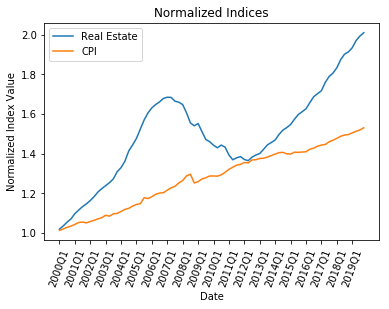

In [16]:
ax = returns.plot(kind='line')
#The set_ticks and set_ticklabels functions allow for choosing which labels are shown
#And as well what the labels are
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])
#Rotate the xticks
plt.xticks(rotation=70)
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")
plt.show()

In [17]:
ax = returns.plot(kind='line')
#The set_ticks and set_ticklabels functions allow for choosing which labels are shown
#And as well what the labels are
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])
#Rotate the xticks
plt.xticks(rotation=70)
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")
plt.savefig("Images/Real Estate vs. Inflation.png")
plt.close()

In [18]:
ax = returns.plot(kind='line')
#The set_ticks and set_ticklabels functions allow for choosing which labels are shown
#And as well what the labels are
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])
#Rotate the xticks
plt.xticks(rotation=70)
plt.ylabel("Normalized Index Value")
plt.xlabel("Date")
plt.title("Normalized Indices")



#You will notice it gets cut off before, but if we use bbox_inches=tight it will make sure everything fits
plt.savefig("Images/Real Estate vs. Inflation.png", bbox_inches="tight")
plt.close()

In [19]:
#Create a field measuring the total growth in real estate adjusted for inflation
returns["Real Estate Inflation Adjusted"] = returns["Real Estate"] / returns["CPI"]
print(returns)

              Real Estate       CPI  Real Estate Inflation Adjusted
Year Quarter                                                       
2000 1           1.019145  1.013033                        1.006033
     2           1.035752  1.020142                        1.015302
     3           1.054586  1.028436                        1.025427
     4           1.070837  1.034360                        1.035265
2001 1           1.097240  1.043246                        1.051755
     2           1.115628  1.052725                        1.059752
     3           1.132947  1.055095                        1.073787
     4           1.147017  1.050948                        1.091412
2002 1           1.163491  1.057464                        1.100265
     2           1.183304  1.063981                        1.112147
     3           1.206768  1.071090                        1.126672
     4           1.223865  1.077014                        1.136350
2003 1           1.238780  1.089455             

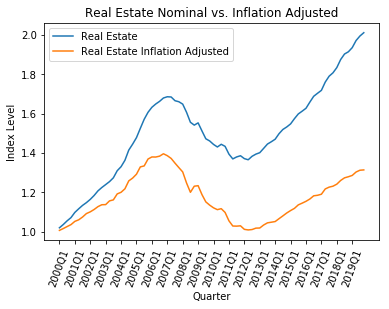

In [20]:
ax = returns[["Real Estate", "Real Estate Inflation Adjusted"]].plot(kind='line')
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])
plt.xticks(rotation=70)
plt.xlabel("Quarter")
plt.ylabel("Index Level")
plt.title("Real Estate Nominal vs. Inflation Adjusted")
plt.show()

In [21]:
ax = returns[["Real Estate", "Real Estate Inflation Adjusted"]].plot(kind='line')
ax.xaxis.set_ticks(index_positions[::4])
ax.xaxis.set_ticklabels(quarter_index[::4])
plt.xticks(rotation=70)
plt.xlabel("Quarter")
plt.ylabel("Index Level")
plt.title("Real Estate Nominal vs. Inflation Adjusted")
plt.savefig("Images/Real Estate Inflation Adjusted.png", bbox_inches="tight")

In [22]:
#Using pct_change() gives the perctange change between periods
quarterly_returns = data[["Real Estate"]].pct_change().reset_index()
print(quarterly_returns)

     Year  Quarter  Real Estate
0    1975        1          NaN
1    1975        2     0.020077
2    1975        3     0.003444
3    1975        4     0.016999
4    1976        1     0.010929
5    1976        2     0.039746
6    1976        3     0.018349
7    1976        4     0.011411
8    1977        1     0.030879
9    1977        2     0.046803
10   1977        3     0.023525
11   1977        4     0.038306
12   1978        1     0.030421
13   1978        2     0.039322
14   1978        3     0.030098
15   1978        4     0.026754
16   1979        1     0.044571
17   1979        2     0.032823
18   1979        3     0.020975
19   1979        4     0.019817
20   1980        1     0.017397
21   1980        2     0.016000
22   1980        3     0.028642
23   1980        4     0.002679
24   1981        1     0.005535
25   1981        2     0.020689
26   1981        3     0.014877
27   1981        4     0.000550
28   1982        1     0.016116
29   1982        2     0.008741
..    ..

In [23]:
quarterly_returns = quarterly_returns.pivot("Year", "Quarter", "Real Estate")
print(quarterly_returns)

Quarter         1         2         3         4
Year                                           
1975          NaN  0.020077  0.003444  0.016999
1976     0.010929  0.039746  0.018349  0.011411
1977     0.030879  0.046803  0.023525  0.038306
1978     0.030421  0.039322  0.030098  0.026754
1979     0.044571  0.032823  0.020975  0.019817
1980     0.017397  0.016000  0.028642  0.002679
1981     0.005535  0.020689  0.014877  0.000550
1982     0.016116  0.008741 -0.009380  0.012535
1983     0.017545  0.011204  0.007877  0.005668
1984     0.015371  0.013036  0.009215  0.008062
1985     0.014199  0.015127  0.015457  0.011162
1986     0.019299  0.020827  0.015135  0.015494
1987     0.019791  0.015385  0.011329  0.006460
1988     0.015637  0.019900  0.010283  0.009265
1989     0.011637  0.013740  0.021181  0.008334
1990     0.005571  0.004140  0.006003 -0.003918
1991     0.008350  0.006781  0.001669  0.014102
1992     0.007745 -0.000233  0.011473  0.005009
1993     0.000401  0.009506  0.008055  0

In [24]:
#Cut to 2000 and on
quarterly_returns = quarterly_returns.loc['2000':]
print(quarterly_returns)

Quarter         1         2         3         4
Year                                           
2000     0.019145  0.016295  0.018183  0.015410
2001     0.024656  0.016759  0.015525  0.012418
2002     0.014362  0.017029  0.019829  0.014168
2003     0.012187  0.012184  0.015411  0.028326
2004     0.015643  0.024409  0.038143  0.021346
2005     0.022965  0.031942  0.030194  0.022648
2006     0.015827  0.010232  0.008211  0.010260
2007     0.003739 -0.000687 -0.011236 -0.003155
2008    -0.007296 -0.025317 -0.031519 -0.009274
2009     0.007396 -0.026413 -0.026305 -0.007593
2010    -0.012011 -0.009010  0.009527 -0.007248
2011    -0.027587 -0.017412  0.007316  0.004422
2012    -0.010605 -0.004222  0.012917  0.007986
2013     0.005207  0.015573  0.015522  0.008166
2014     0.008803  0.019089  0.014360  0.008354
2015     0.010145  0.017208  0.015248  0.008805
2016     0.009170  0.019296  0.017857  0.009101
2017     0.008680  0.024519  0.016899  0.009603
2018     0.014785  0.022364  0.014915  0

In [25]:
quarterly_returns.to_csv("Tables/Real Estate Returns.csv")